In [2]:
import sys
from pathlib import Path


PROJECT_ROOT = Path(r"C:\Users\anuri\OneDrive\Desktop\Plant Disease\Plant-Disease-Detection-main")

sys.path.insert(0, str(PROJECT_ROOT))

print("Project root exists:", PROJECT_ROOT.exists())
print("src exists:", (PROJECT_ROOT/ "src").exists())
print("src init exists:", (PROJECT_ROOT/ "src"/ "__init__.py").exists())

Project root exists: True
src exists: True
src init exists: True


In [4]:
from src.models import build_dataset

image_root = r"C:\Users\anuri\OneDrive\Desktop\Plant Disease\Plant-Disease-Detection-main\data\plantvillage dataset\color"

X,y = build_dataset(image_root, 100)

print(len(X), len(y))

3800 3800


In [3]:
import sys
from src.models import build_dataset

print("imports worked")

imports worked


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(X) #coverting to array
y = np.asarray(y)

#the numbers used are abitrary 
X_train, X_temp, y_train, y_temp = train_test_split( 
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

model = LinearSVC(random_state=42)
model.fit(X_train_s, y_train)

print(model.score(X_val_s, y_val))
print(model.score(X_test_s, y_test))

0.38596491228070173
0.3368421052631579


In [7]:
#how well the model performs and where the model is getting confused
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_test_s)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.07      0.06      0.06        18
                                 Apple___Black_rot       0.46      0.35      0.40        17
                          Apple___Cedar_apple_rust       0.60      0.26      0.36        23
                                   Apple___healthy       0.25      0.11      0.15         9
                               Blueberry___healthy       0.75      0.14      0.24        21
          Cherry_(including_sour)___Powdery_mildew       0.40      0.57      0.47        14
                 Cherry_(including_sour)___healthy       0.38      0.46      0.41        13
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.25      0.54      0.34        13
                       Corn_(maize)___Common_rust_       0.30      1.00      0.46        16
               Corn_(maize)___Northern_Leaf_Blight       0.67      0.11      0.

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy:", rf.score(X_test, y_test))

Accuracy: 0.543859649122807


In [9]:
from sklearn.metrics import classification_report

rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.43      0.17      0.24        18
                                 Apple___Black_rot       0.60      0.53      0.56        17
                          Apple___Cedar_apple_rust       0.47      0.30      0.37        23
                                   Apple___healthy       0.24      0.44      0.31         9
                               Blueberry___healthy       0.61      0.52      0.56        21
          Cherry_(including_sour)___Powdery_mildew       0.48      0.71      0.57        14
                 Cherry_(including_sour)___healthy       0.56      0.69      0.62        13
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.40      0.62      0.48        13
                       Corn_(maize)___Common_rust_       0.89      1.00      0.94        16
               Corn_(maize)___Northern_Leaf_Blight       0.67      0.42      0.

In [10]:
from sklearn.metrics import accuracy_score

# Make predictions
svm_pred = model.predict(X_test_s)
rf_pred = rf.predict(X_test)

# Compare accuracies
print("SVM accuracy:", accuracy_score(y_test, svm_pred))
print("Random Forest accuracy:", accuracy_score(y_test, rf_pred))

SVM accuracy: 0.3368421052631579
Random Forest accuracy: 0.543859649122807


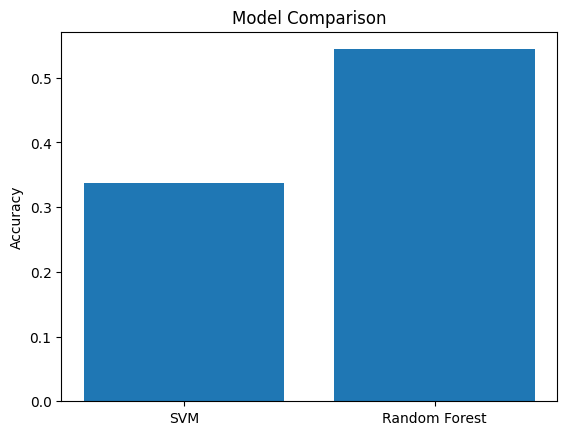

In [11]:
import matplotlib.pyplot as plt

models = ["SVM", "Random Forest"]
accuracies = [accuracy_score(y_test, svm_pred), accuracy_score(y_test, rf_pred)]

plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


##classical ml baseline results
svm accuracy = 0.3
rforest accuracy = 0.5

##testing my git changes for the 1000thhhh time